x


Text(10, 10, 'K=1\ny=0.0476')

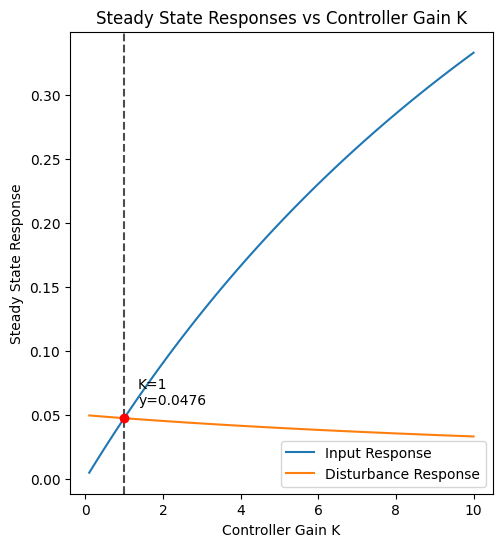

In [ ]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt

plant = ct.tf([1], [1, 20, 20])
# controller K 0 < K <= 10
K = np.arange(0.1, 10.1, 0.1)
output_sys = []
output_td = []
for k in K:
    controller = ct.tf([k], [1])
    sys = ct.feedback(ct.series(controller, plant), 1)
    sys_td = ct.feedback(plant, controller)
    
    y_sys = sys.step_response().outputs
    y_td = sys_td.step_response().outputs
    output_sys.append(y_sys)
    output_td.append(y_td)

# steady-state values (last sample of each step response)
ss_sys = np.array([y[-1] for y in output_sys])
ss_td = np.array([y[-1] for y in output_td])

# difference and first intersection detection
diff = ss_sys - ss_td
tol = 1e-9

# if any difference is (approximately) zero, take the first such K
zero_idx = np.where(np.abs(diff) <= tol)[0]
idx = int(zero_idx[0])

K_intersect = K[idx]
steady_state_intersect = 0.5 * (ss_sys[idx] + ss_td[idx])  # intersection y (average at idx)

# plotting
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(K, ss_sys, label='Input Response')
plt.plot(K, ss_td, label='Disturbance Response')
plt.axvline(K_intersect, color='k', linestyle='--', alpha=0.7)
plt.scatter([K_intersect], [steady_state_intersect], color='red', zorder=5)
plt.title('Steady State Responses vs Controller Gain K')
plt.xlabel('Controller Gain K')
plt.ylabel('Steady State Response')
plt.legend()
plt.annotate(f'K={K_intersect:.3g}\ny={steady_state_intersect:.3g}', 
             (K_intersect, steady_state_intersect),
             textcoords="offset points", xytext=(10,10))